## Importing the libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and pre processing

In [2]:
# Loading the csv data into pandas dataFrame
df=pd.read_csv("D:\MACHINE LEARNING STUDY MATERIAL\Project\gld_price_data.csv")

In [3]:
# Priting the first 5 records of the data
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [44]:
# Printing the last 5 rows
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# Viewing the statistical summary
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
# Getting some basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
## Checking the number of rows and columns 
df.shape

(2290, 6)

In [7]:
## Checking for the missing_values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
## Since the date was in object format we converted it into Date time format
df['Date']=pd.to_datetime(df.Date)

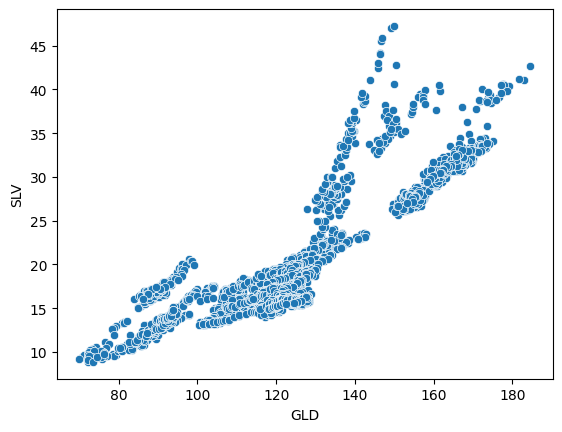

In [46]:
sns.scatterplot(x='GLD',y='SLV',data=df)
plt.show()

In [10]:
## Checking for the correlation
correlation=df.corr()

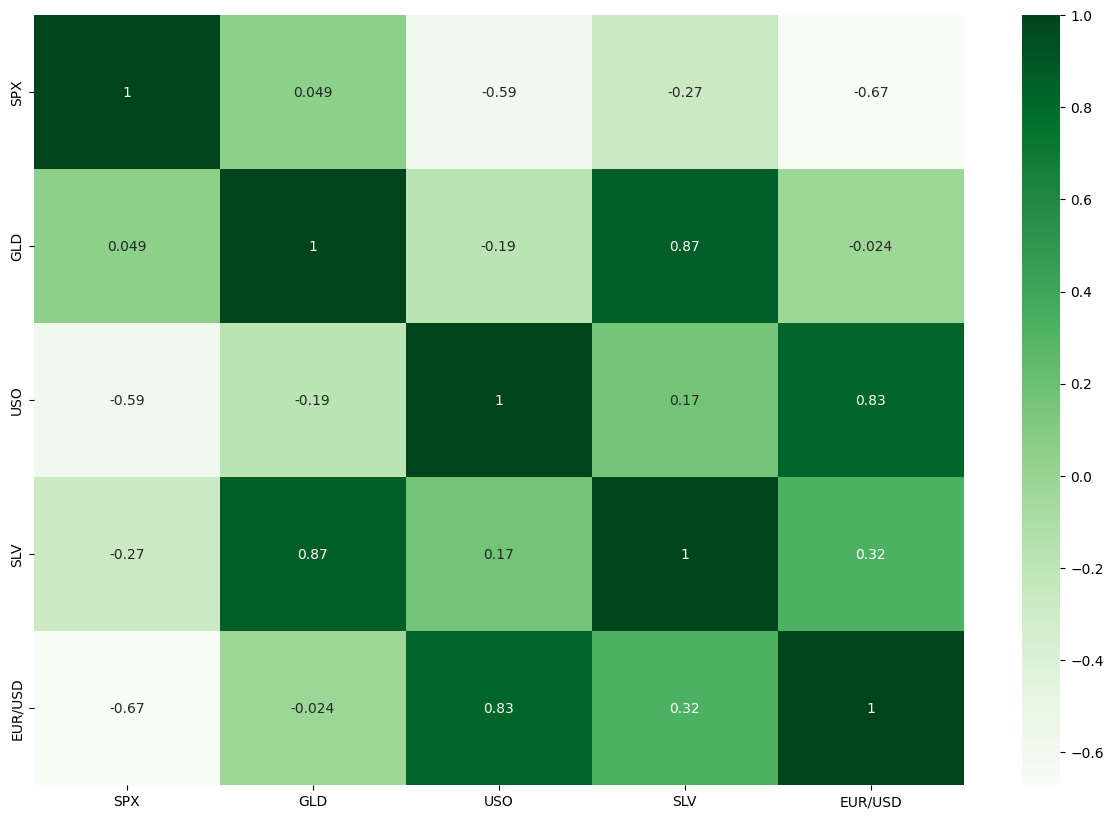

In [11]:
## Ploting the heatmap to check the correlation between the variables
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='Greens')
plt.show()

In [12]:
## Correlation valus of GlD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

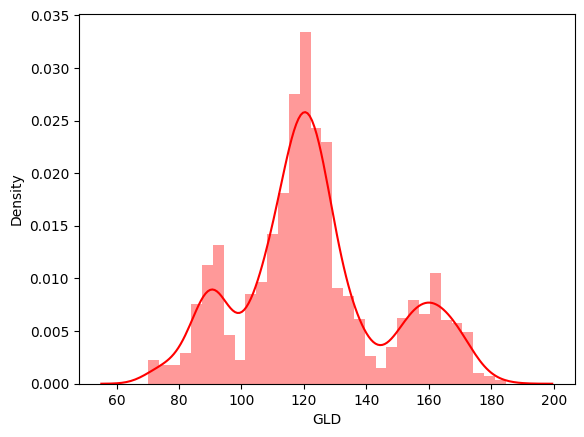

In [37]:
## Checking the Distribution of GLD
sns.distplot(df['GLD'],color='Red')

## Spliting the target variable and other features

In [14]:
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Spliting the data into training and testing data

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
X_train.shape,Y_train.shape

((1832, 4), (1832,))

In [24]:
Y_test.shape,Y_test.shape

((458,), (458,))

## Model building using Random Forest Regressor

In [25]:
# Training the model
RF=RandomForestRegressor(n_estimators=100)

In [26]:
RF.fit(X_train,Y_train)

RandomForestRegressor()

## Model Evaluation

In [27]:
## Prediction on test data
Y_pred=RF.predict(X_test)

In [30]:
## R_squared error
error_score=metrics.r2_score(Y_test,Y_pred)

In [41]:
print('R_squared error:',error_score)

R_squared error: 0.9886727554162714


## Comparing the actual price vs the predicted price in a plot

In [42]:
Y_test=list(Y_test)

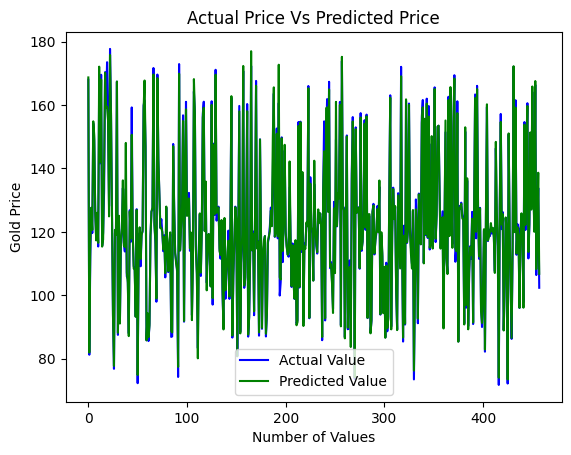

In [43]:
plt.plot(Y_test,color="Blue",label='Actual Value')
plt.plot(Y_pred,color="Green",label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()